# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [19]:
# Load data
df = pd.read_csv('data/cars.csv')
df.head()
print(df.shape)

(11914, 15)


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [20]:
# 1. Print the number of duplicate rows we have in our dataframe.
print(df.duplicated().sum())


720


In [21]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)

(11194, 15)


In [22]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [23]:
# * Which column has the most null values and how many null values does it have?
df_null_counts = df.isnull().sum()
column_with_most_nulls = df_null_counts.idxmax()

print(f"The column with the most null values is '{column_with_most_nulls}' with {df_null_counts[column_with_most_nulls]} null values.")


The column with the most null values is 'Engine HP' with 69 null values.


In [24]:
# * Print how long our dataframe is.
print(f"Our dataframe is {len(df)} rows long")


Our dataframe is 11194 rows long


In [25]:
# * Remove any row that has a null value in it.

df_no_nulls = df.dropna() #drops all null values
 

In [26]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print(df_no_nulls.isnull().sum()) #Should print 0 for each column (extra sanity check)
print(f"\nOur dataframe is {len(df)} rows long")
print(df_no_nulls.shape)

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Our dataframe is 11194 rows long
(11092, 15)


### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

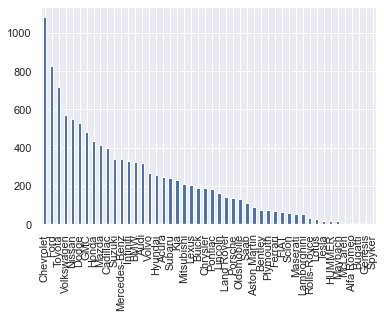

In [27]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

make_count = df['Make'].value_counts()

make_count.plot(kind='bar')






# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

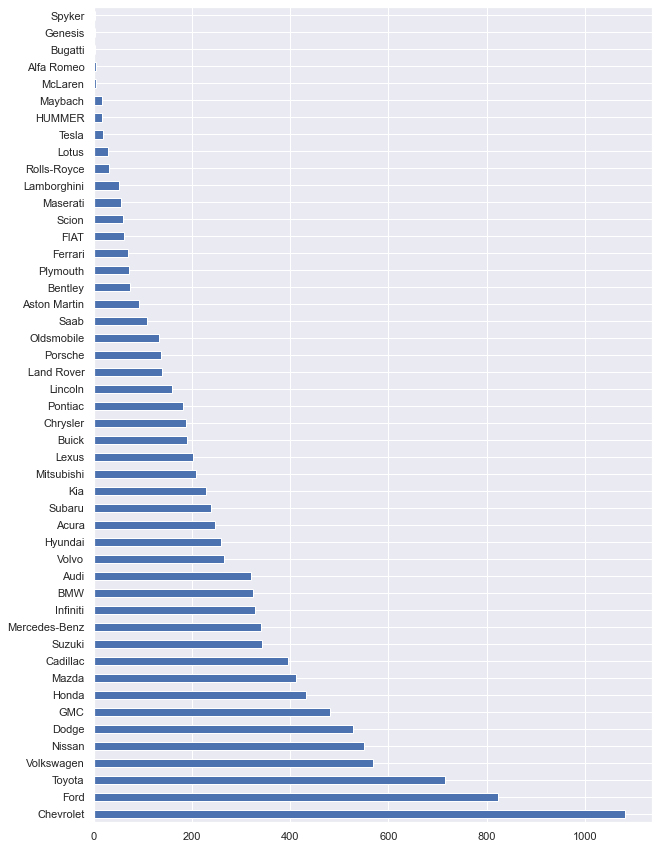

In [28]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.

make_count.sort_values()
make_count.plot(kind='barh', figsize=(10, 15))



# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


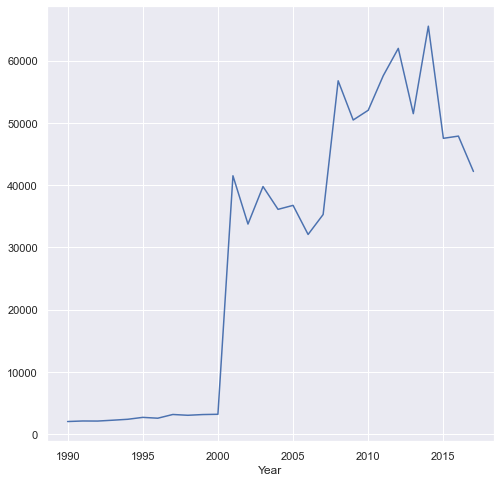

In [29]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
gb = df.groupby('Year')['MSRP'].mean()
gb.plot(kind = 'line', x = 'Year', y = 'MSRP', figsize=(8,8))

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [30]:
# Make a column where is 10 when year is less than 2000, else 1.
df['price_adjuster'] = np.where((df['Year']<2000), 10, 1)

# Multiply the MSRP by the price adjuster.
df['adjusted_price'] = df['MSRP'] * df['price_adjuster']
df[df['Year'] < 2000][['Year', 'MSRP', 'adjusted_price']].head(20)

,Year,MSRP,adjusted_price
17,1992,2000,20000
19,1992,2000,20000
21,1992,2000,20000
22,1993,2000,20000
23,1993,2000,20000
26,1993,2000,20000
27,1994,2000,20000
28,1994,2000,20000
29,1994,2000,20000
30,1994,2000,20000


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

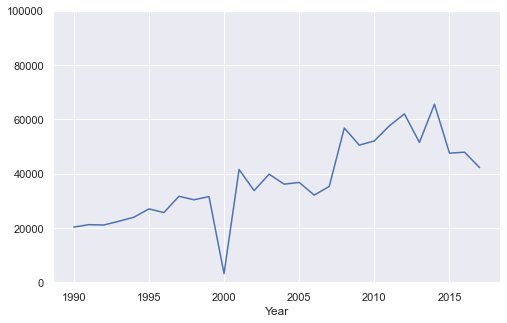

In [31]:
# Plot new prices
gb = df.groupby('Year')['adjusted_price'].mean()
gb.plot(kind='line', figsize=(8,5), ylim=(0, 100000))

# Plot the relationship between Engine HP and highway MPG

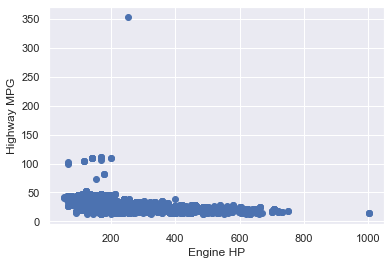

In [32]:
# Plot the relationship between Engine HP and highway MPG
plt.scatter(df['Engine HP'], df['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.show()

In [34]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
outlier1 = df['Engine HP'] > 800
outlier2 = df['Highway MPG'] > 150

df = df.drop(df[df['Engine HP'] == outlier1].index) 
# Need to try again

KeyError: 'Highway MPG'

# Replot the relationship between Engine HP and highway MPG


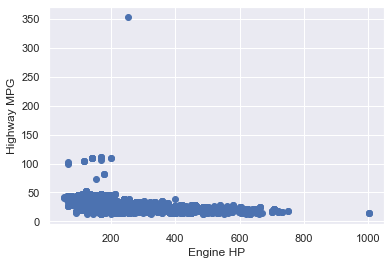

In [35]:
# Re-Plot the relationship between Engine HP and highway MPG
plt.scatter(df['Engine HP'], df['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.show()

# Need help for this one

# Make a scatter plot of Engine HP vs highway MPG

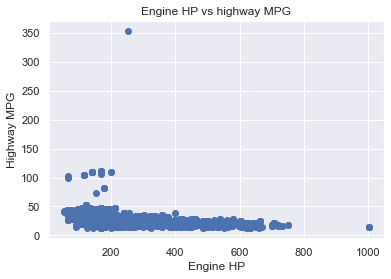

In [36]:
# Make a scatter plot of Engine HP vs highway MPG
plt.scatter(df['Engine HP'], df['highway MPG'])
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.title('Engine HP vs highway MPG')
plt.show()

# What does this plot tell you about how Engine HP affects highway MPG?

In [37]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('The cars with lower Engine HP tend to get more Highway MPG. Also, this datatable does not have many cars with an Engine HP between 800 and 1000')

The cars with lower Engine HP tend to get more Highway MPG. Also, this datatable does not have many cars with an Engine HP between 800 and 1000


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

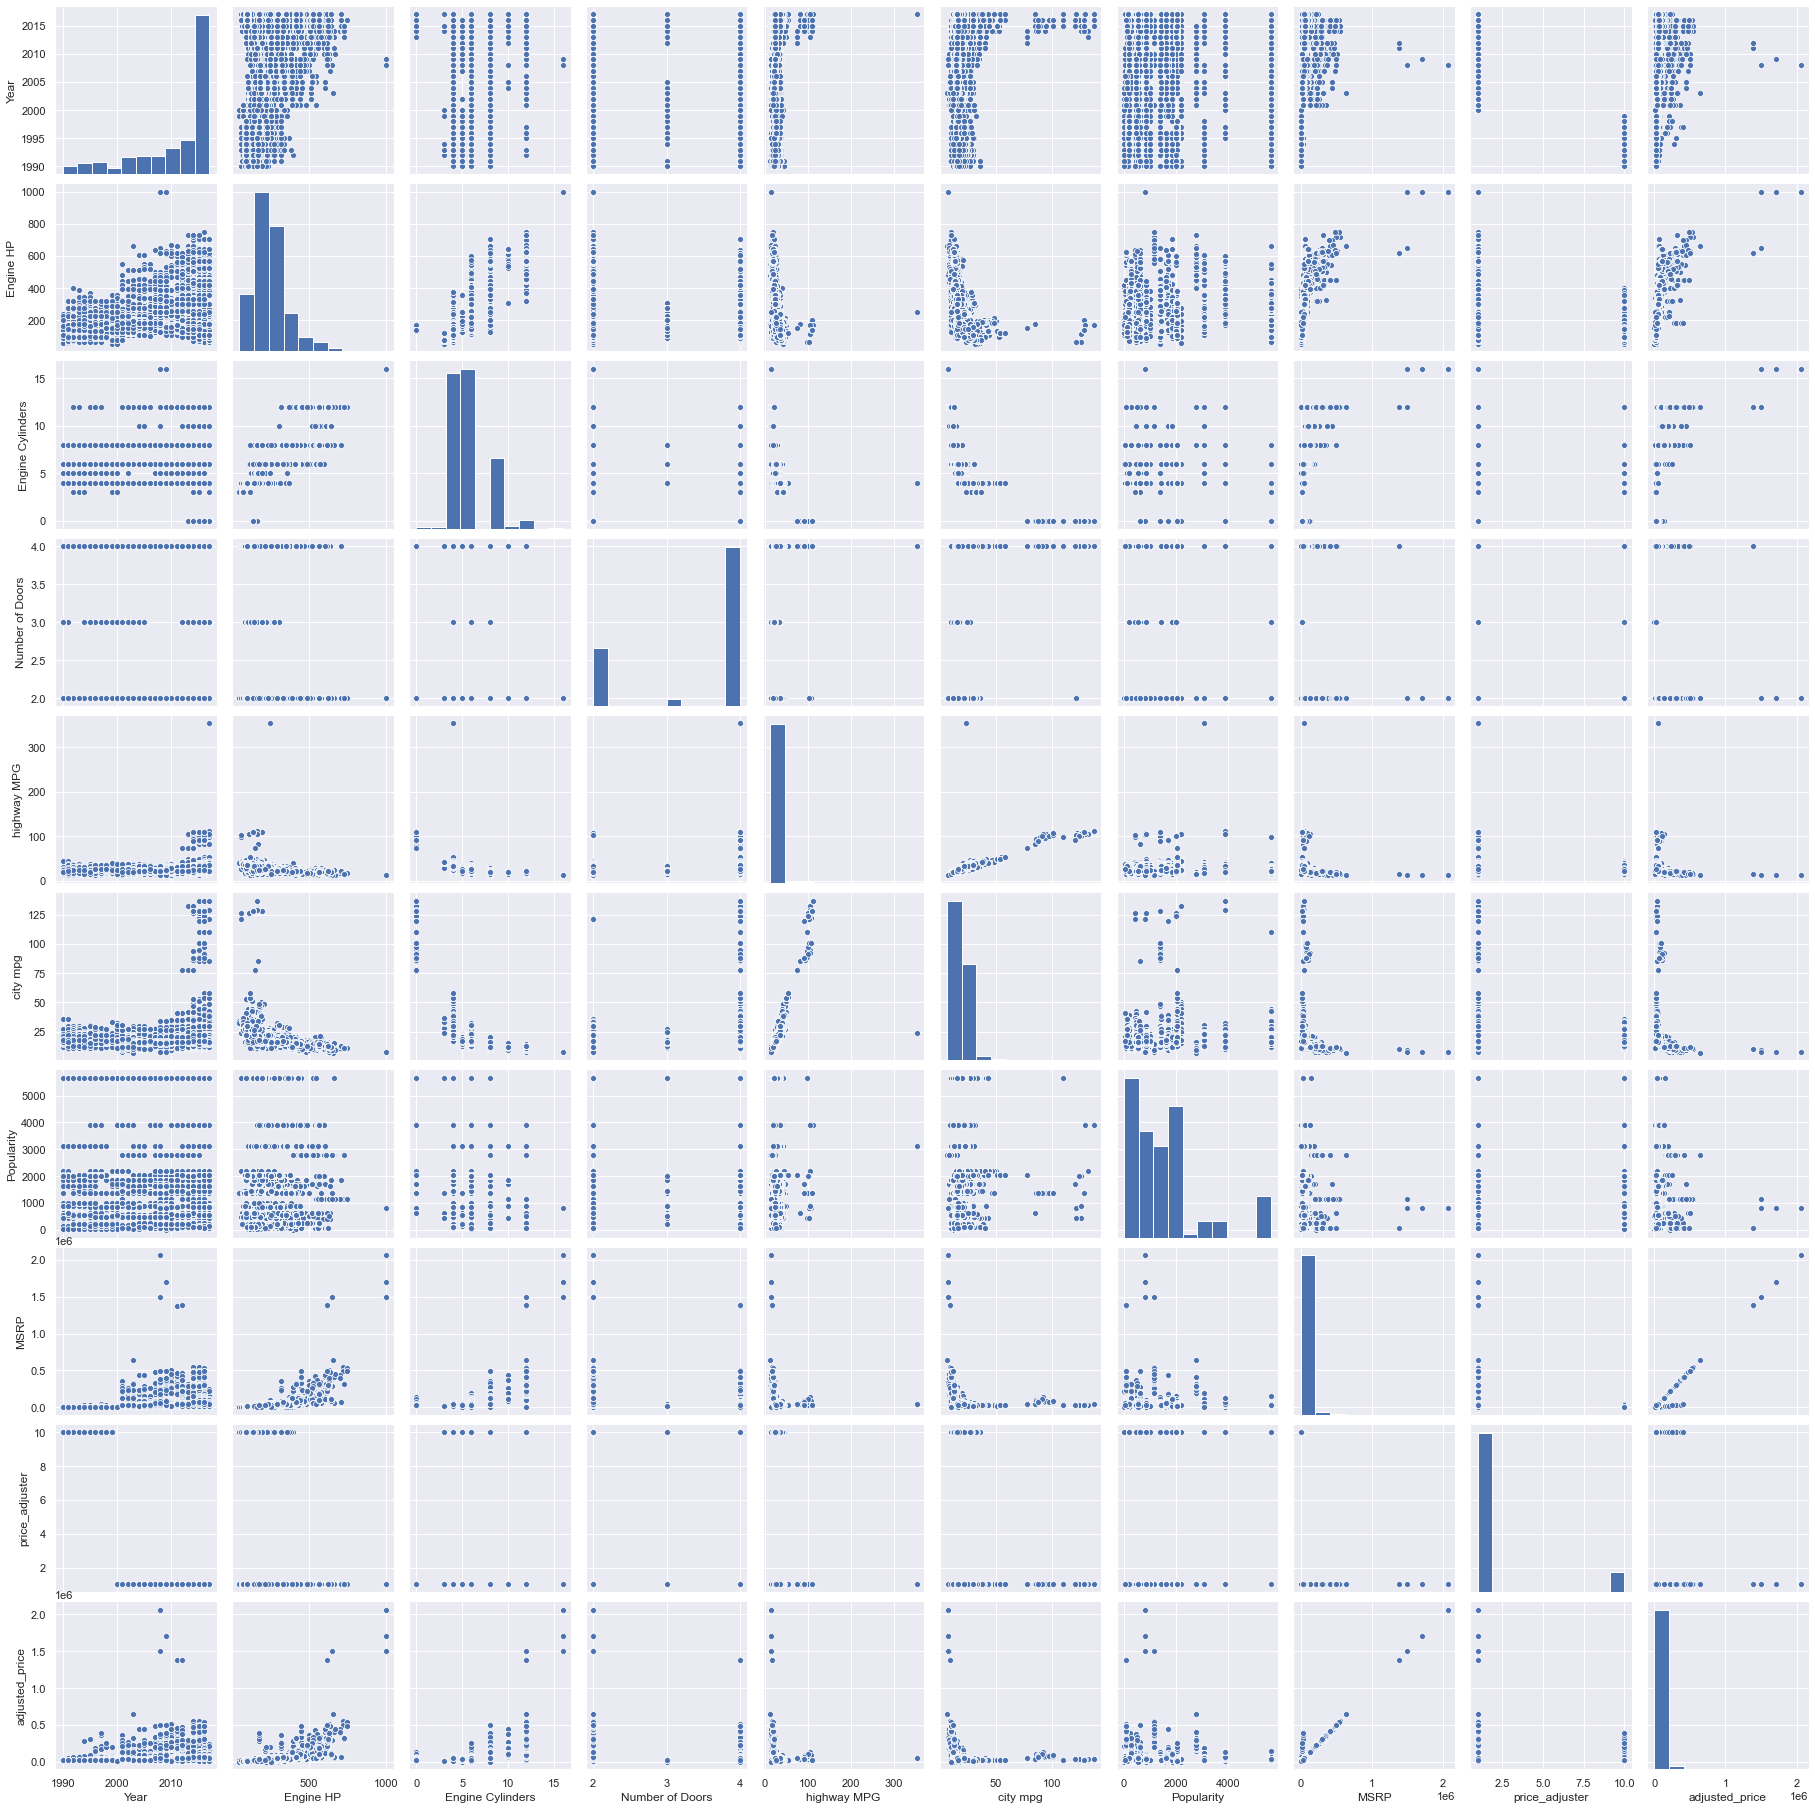

In [38]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df)

In [39]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('City MPG and Highway MPG have the strongest linear relationship')

City MPG and Highway MPG have the strongest linear relationship


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

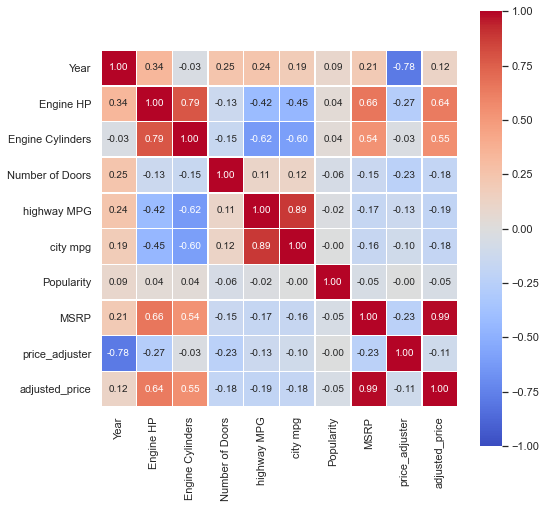

In [42]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

corr = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5, square=True, fmt='.2f')


In [17]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has the strongest relationship with Engine Cylinders. That is probably because the amount of HP of a car is directly correlated with how many cylinders it has.')

Your answer here


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


